# Import Datasets

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv(r"C:\Users\Rohan Ekbote\OneDrive\Desktop\DS Proj\t2\train.csv")

In [74]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning

In [76]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [77]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [78]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Data Visualisation

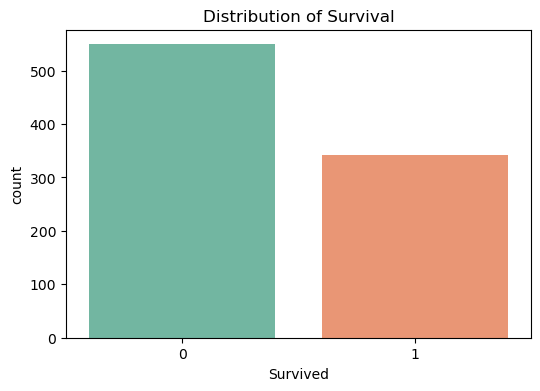

In [79]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data,palette='Set2')
plt.title('Distribution of Survival')
plt.show()

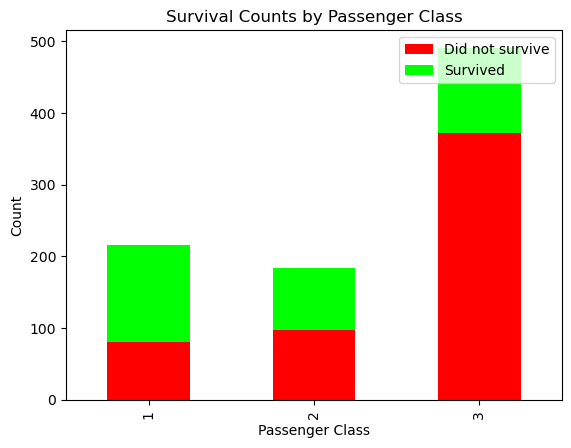

In [80]:
counts = data.groupby(['Pclass', 'Survived']).size().unstack()
counts.plot(kind="bar", stacked=True, color=['#FF0000', '#00FF00'])  
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'], loc='upper right')
plt.show()

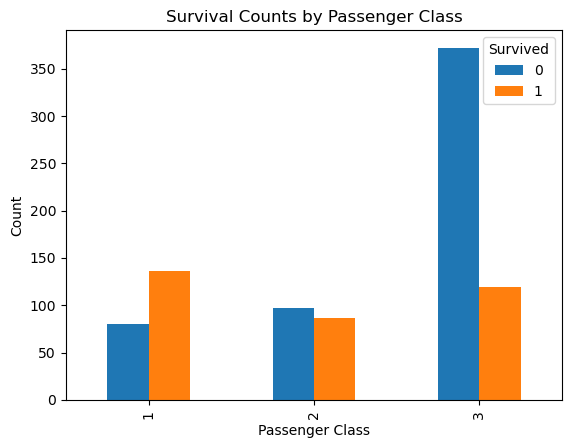

In [81]:
counts = data.groupby(['Pclass', 'Survived']).size().unstack()
counts.plot(kind="bar")
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

In [82]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Adult', 'Mid-Age', 'Senior'])
survival_by_agegroup = data.groupby('AgeGroup')['Survived'].mean()
print(survival_by_agegroup)

AgeGroup
Child      0.503597
Adult      0.331096
Mid-Age    0.423237
Senior     0.343750
Name: Survived, dtype: float64


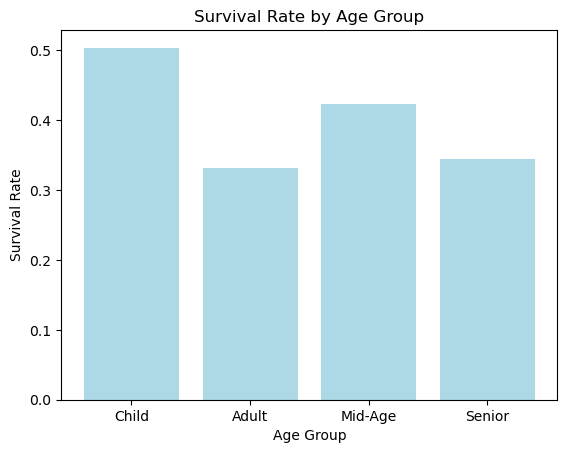

In [83]:
plt.bar(survival_by_agegroup.index, survival_by_agegroup.values,color="lightblue")
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

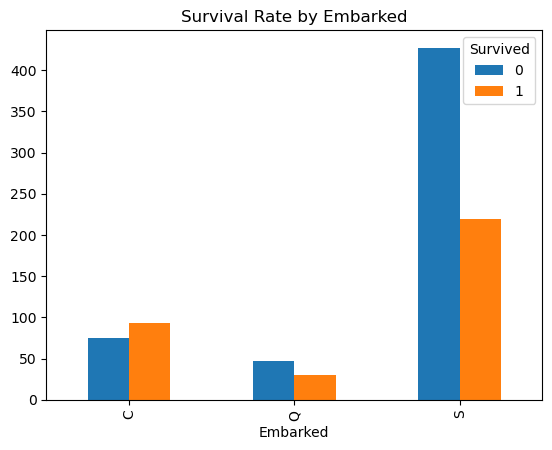

In [84]:
counts = data.groupby(['Embarked', 'Survived']).size().unstack()
counts.plot(kind="bar")
plt.title('Survival Rate by Embarked')
plt.show()

In [85]:
male_ind = len(data[data['Sex'] == 'male'])
print("No. of Male Passengers: ", male_ind)

No. of Male Passengers:  577


In [86]:
female_ind = len(data[data['Sex'] == 'female'])
print("No. of Female Passengers: ", female_ind)

No. of Female Passengers:  314


Text(0.5, 1.0, 'Gender Distribution of Passengers Travelled')

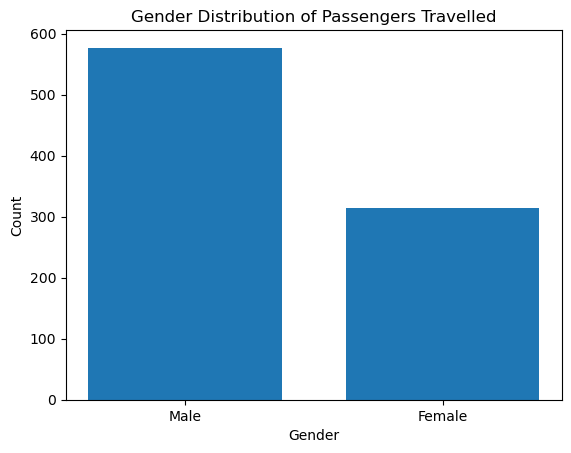

In [87]:
plt.hist(data['Sex'], bins=2, rwidth=0.75)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Male', 'Female'])
plt.title('Gender Distribution of Passengers Travelled')

In [88]:
alive = len(data[data['Survived'] == 1])
print("No. of Survived Passengers: ", alive)
dead  = len(data[data['Survived'] == 0])
print("No. of Dead Passengers: ", dead)

No. of Survived Passengers:  342
No. of Dead Passengers:  549


Text(0.5, 1.0, 'Survival Status of Passengers')

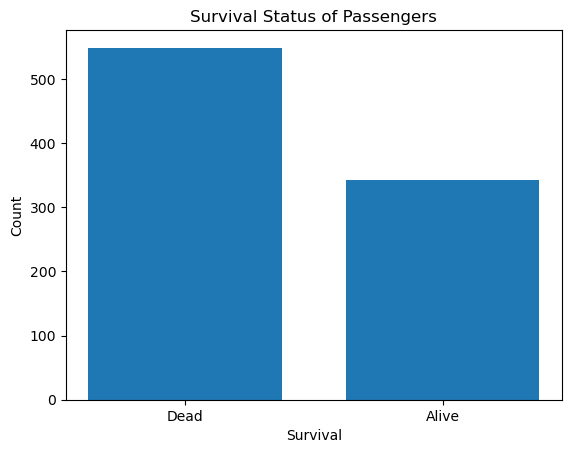

In [89]:
plt.hist(data['Survived'], bins=2, rwidth=0.75)
plt.xlabel('Survival')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Dead', 'Alive'])
plt.title('Survival Status of Passengers')